Práctica 1 - Procesado Básico de Imágenes
==
Hardware de Aplicación Específica
--
---
###### José Luis Garrido Labrador

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, subplot, plot, title, imshow
import numpy as np
import os

### Lectura de image

Introduzca el nombre de una imagen en blanco y negro: imbn01.png


Text(0.5, 1.0, 'Histograma')

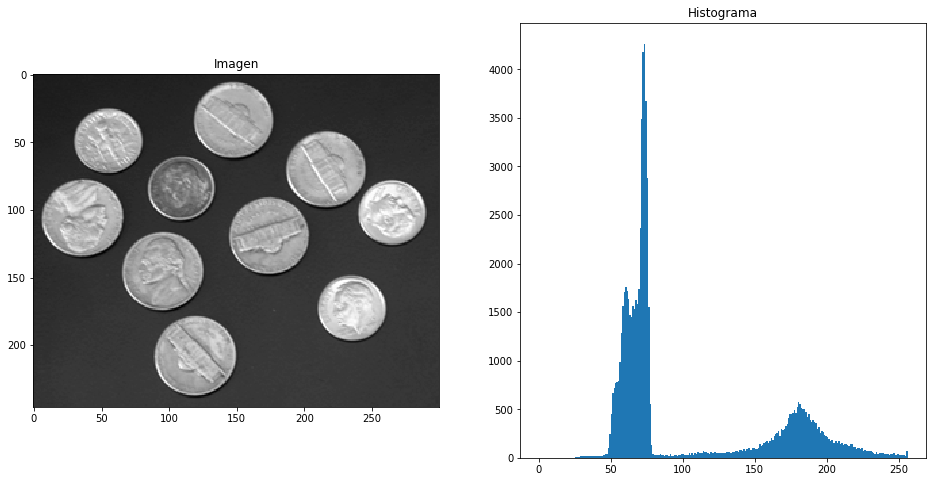

In [2]:
entrada = False
while not entrada:
    nombre = input("Introduzca el nombre de una imagen en blanco y negro: ")
    nombre = os.path.join("..","images",nombre)
    if os.path.isfile(nombre):
        imagen = cv2.imread(nombre,0)
        entrada = True
    else:
        print("La imagen no existe")

##Histograma
figure(figsize=(16, 8))
subplot(1,2,1)
imshow(imagen,cmap='gray')
title("Imagen")
subplot(1,2,2)
plt.hist(imagen.ravel(),256,[0,256]);
title("Histograma")

### Cambio de Brillo

Introduzca un brillo entre -255 y 255: 25


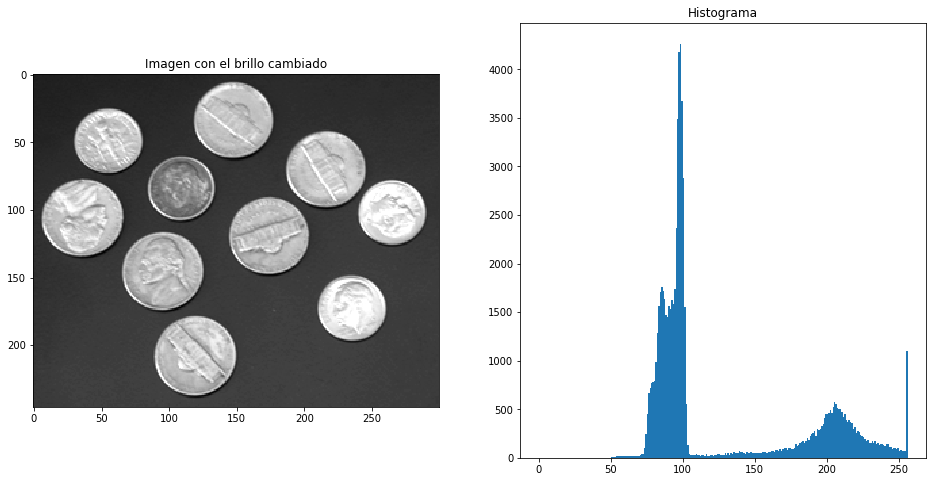

In [3]:
valor=256;
while(valor<-255 or valor>255):
    valor = int(input("Introduzca un brillo entre -255 y 255: "))
imgB = np.copy(imagen)
if valor > 0:
    lim = 255 - valor #valor es el brillo a aumentar
    imgB[imgB>lim] = 255
    imgB[imgB<=lim] += valor
else:
    lim = 0 + np.abs(valor) #valor es el brillo a disminuir
    imgB[imgB<lim] = 0
    imgB[imgB>=lim] -= np.abs(valor)

figure(figsize=(16, 8))
subplot(1,2,1);
imshow(imgB, cmap='gray');
title('Imagen con el brillo cambiado');
subplot(1,2,2);
plt.hist(imgB.ravel(),256,[0,256]);
title('Histograma');


### Ecualización

Text(0.5, 1.0, 'Histograma')

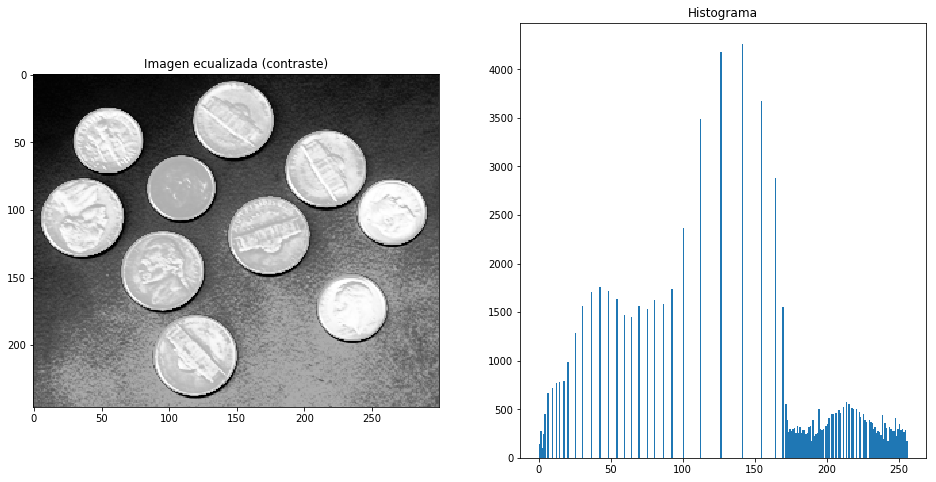

In [4]:
ecualizado = cv2.equalizeHist(imagen);

figure(figsize=(16, 8))
subplot(1,2,1);
imshow(ecualizado, cmap='gray');
title('Imagen ecualizada (contraste)');
subplot(1,2,2);
plt.hist(ecualizado.ravel(),256,[0,256]);
title('Histograma')

### Eliminación por itencidad

Introduzca una intensidad entre 0 y 255: 55


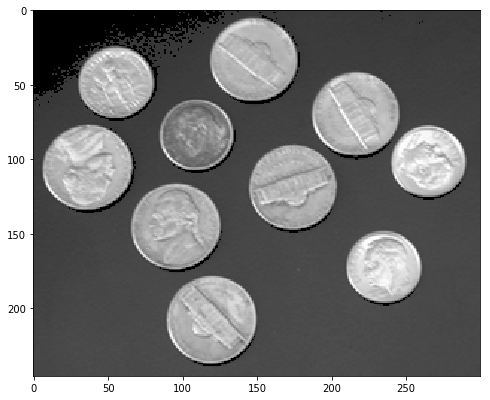

In [5]:
intensidad=-5
while(intensidad<0 or intensidad>255):
    intensidad=int(input('Introduzca una intensidad entre 0 y 255: '))
    
imgInt = np.copy(imagen)
imgInt[imgInt<intensidad]=0
figure(figsize=(8, 8))
imshow(imgInt,cmap='gray')

### Filtrado

Introduzca el tamaño de la máscara mayor que 1 y menos que 246: 11
Introduzca el tamaño de la máscara mayor que 1 y menos que 246: 11
11


Text(0.5, 1.0, 'Filtrado Gaussiano')

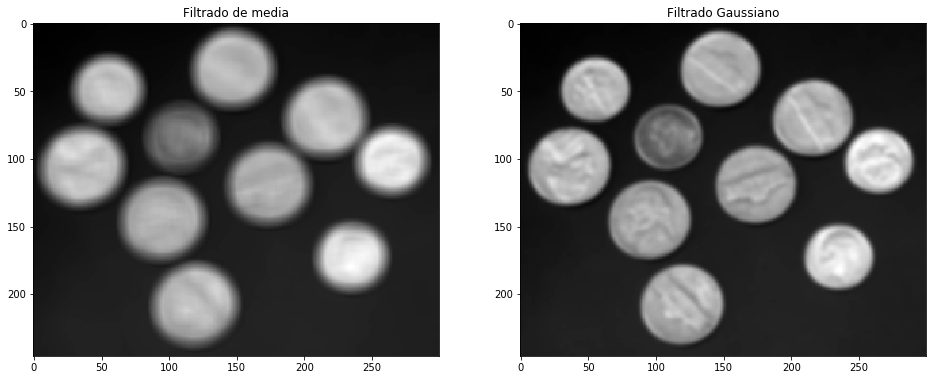

In [7]:
M,N = imagen.shape

NP=0;
while(NP<1 or NP>min(M,N)):
    NP=int(input("Introduzca el tamaño de la máscara mayor que 1 y menos que "+str(min(M,N))+": "))
    
NG = -1
while(NG <0 or NG >(min(M,N))):
    NG=int(input("Introduzca el tamaño de la máscara mayor que 1 y menos que "+str(min(M,N))+": "))
    
sigGauss = (NG-1)/6
print(NG)
imgAvg = cv2.blur(imagen,(NP, NP))
imgGus = cv2.GaussianBlur(imagen, (NG, NG), sigGauss, sigGauss)

figure(figsize=(16,8))
subplot(1,2,1)
imshow(imgAvg,cmap='gray')
title('Filtrado de media')
subplot(1,2,2)
imshow(imgGus,cmap='gray')
title('Filtrado Gaussiano')
